In [79]:
# pip install ipfn


In [80]:
# import pandas as pd
# from ipfn import ipfn
# import numpy as np
# #a=pd.read_csv("/content/2D Ipf - Untitled spreadsheet - Sheet1.csv")
# n=[[[476,410],[472,400],[407,483],[413,413]],[[410,400],[465,472],[460,488],[424,491]]]


# xipp=np.array([4200,3446])
# xpjp=np.array([2005,2000,1958,2043])
# xppk=np.array([4250,4500])
# xijp=np.array([[975,981,974,975],[946,952,947,946]])
# xpjk=np.array([[1200,1183],[1000,950],[900,1050],[950,1109]])

# n=np.array(n)
# aggregates=[xipp,xpjp,xppk,xijp,xpjk]
# dimensions=[[0],[1],[2],[0,1],[1,2]]
# IPF=ipfn.ipfn(n,aggregates,dimensions,convergence_rate=1e-6)
# n=IPF.iteration()
# print(n)


In [81]:
import pandas as pd
import numpy as np
import random
import itertools

'''
code for testing 

NOT IMPORTANT!

'''
np.random.seed(37)
random.seed(37)

height = [
    np.random.normal(5.5, 1.0, 100),
    np.random.normal(5.3, 1.0, 200),
    np.random.normal(5.9, 1.0, 300),
    np.random.normal(5.7, 1.0, 200),
    np.random.normal(5.3, 1.0, 400),
    np.random.normal(5.2, 1.0, 500),
    np.random.normal(5.8, 1.0, 300),
    np.random.normal(5.5, 1.0, 200)
]

#height = normal distribution **(HAVE TO BE FETCHED FROM PUMS) 

demographic = [
    ['white', 'minor', 'male'],
    ['white', 'minor', 'female'],
    ['white', 'adult', 'male'],
    ['white', 'adult', 'female'],
    ['other', 'minor', 'male'],
    ['other', 'minor', 'female'],
    ['other', 'adult', 'male'],
    ['other', 'adult', 'female']
]

data = [[{'race': d[0], 'age': d[1], 'gender': d[2], 'height': h} for h in s]
        for d, s in zip(demographic, height)]
data = list(itertools.chain(*data))

df = pd.DataFrame(data)
df.head()

,race,age,gender,height
0,white,minor,male,5.445536
1,white,minor,male,6.174308
2,white,minor,male,5.846647
3,white,minor,male,4.199654
4,white,minor,male,7.018512


#### demographic = cell names for ipf
#### df = generated from cleaned pums data
 

In [82]:
races=['white','black','native','asian','pacific-islander','other']
genders=['male','female']
ages=['child','tenager','young-adult','adult','senior']
demographic = [[i, j, k] for i in races for j in ages for k in genders]
demographic
# demographic ready. 

# data = pums

[['white', 'child', 'male'],
 ['white', 'child', 'female'],
 ['white', 'tenager', 'male'],
 ['white', 'tenager', 'female'],
 ['white', 'young-adult', 'male'],
 ['white', 'young-adult', 'female'],
 ['white', 'adult', 'male'],
 ['white', 'adult', 'female'],
 ['white', 'senior', 'male'],
 ['white', 'senior', 'female'],
 ['black', 'child', 'male'],
 ['black', 'child', 'female'],
 ['black', 'tenager', 'male'],
 ['black', 'tenager', 'female'],
 ['black', 'young-adult', 'male'],
 ['black', 'young-adult', 'female'],
 ['black', 'adult', 'male'],
 ['black', 'adult', 'female'],
 ['black', 'senior', 'male'],
 ['black', 'senior', 'female'],
 ['native', 'child', 'male'],
 ['native', 'child', 'female'],
 ['native', 'tenager', 'male'],
 ['native', 'tenager', 'female'],
 ['native', 'young-adult', 'male'],
 ['native', 'young-adult', 'female'],
 ['native', 'adult', 'male'],
 ['native', 'adult', 'female'],
 ['native', 'senior', 'male'],
 ['native', 'senior', 'female'],
 ['asian', 'child', 'male'],
 ['asia

In [83]:
col_list = ["race", "age", "sex"]
df = pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\pums\\temp_pums.csv", usecols=col_list)
df = df.rename(columns={'sex': 'gender'})
df=df[["race", "age", "gender"]]
# np.random.seed(37)
# random.seed(37)
# df['height']=np.random.uniform(size=len(df),low=4.5,high=6.7)
# "C:\Users\abubabu\Documents\GitHub\synthetic-population-simulation\CA-data\pums\temp_pums.csv"
df.head(20)

,race,age,gender
0,white,adult,female
1,white,senior,male
2,white,adult,male
3,white,adult,female
4,white,adult,male
5,white,senior,female
6,white,senior,male
7,white,young-adult,female
8,white,child,female
9,white,child,male


#### cell 66-73 for visualization

In [84]:
ct = pd.crosstab(df.race, [df.age, df.gender])
ct #cross-tabulation of the resulting sampled matrix.

age               adult        child       senior       tenager        \
gender           female  male female  male female  male  female  male   
race                                                                    
asian                95    75      7     8     21    10      32    33   
black                73   121     23    16     11    20      58    77   
native              814   836    245   274    325   259     607   654   
other               253   359    142   118     97    83     247   257   
pacific-islander      2     5      3     1      2     4       0     1   
white              7241  7390   1216  1262   6267  5725    2808  3106   

age              young-adult        
gender                female  male  
race                                
asian                     35    31  
black                     19    51  
native                   192   230  
other                     93    79  
pacific-islander           1     4  
white                   1293  1485

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_percentage(col):
    global df
    # Count the frequencies of different values in the column
    value_counts = df[col].value_counts()

    # Calculate the percentages
    percentages = (value_counts / len(df)) * 100

    # Create a bar plot of the percentages
    plt.bar(percentages.index, percentages.values)

    # Set the labels and title
    plt.xlabel('Values')
    plt.ylabel('Percentage')
    plt.title('Percentage of '+col+'s in Column')

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

In [86]:
df.race.value_counts().sort_index() / df.shape[0]

asian               0.007746
black               0.010470
native              0.099027
other               0.038575
pacific-islander    0.000513
white               0.843669
Name: race, dtype: float64

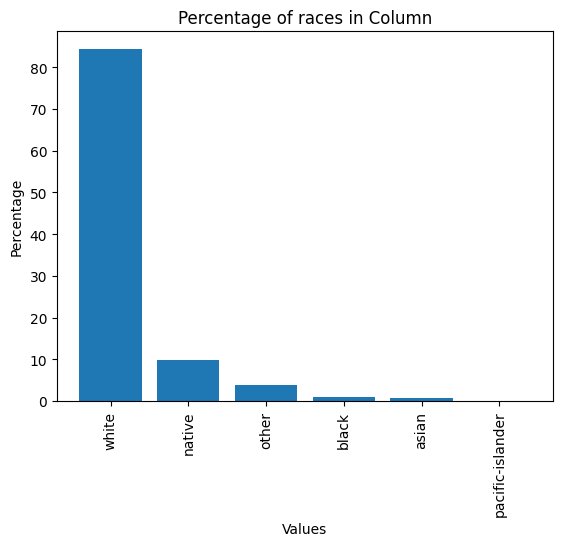

In [87]:
plot_percentage('race')

In [88]:
df.age.value_counts().sort_index() / df.shape[0]

adult          0.385392
child          0.074002
senior         0.286276
tenager        0.175909
young-adult    0.078422
Name: age, dtype: float64

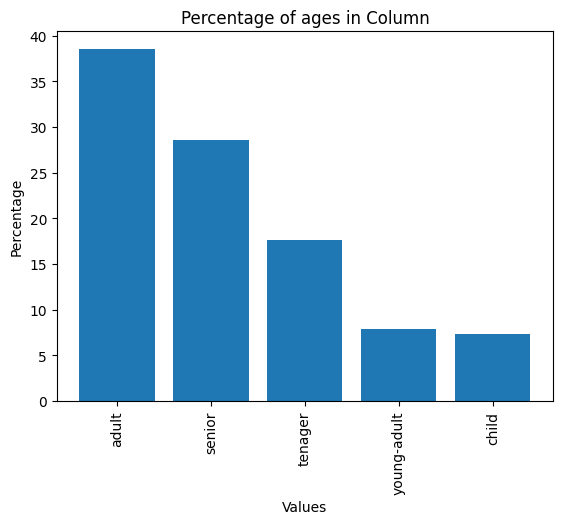

In [89]:
plot_percentage('age')

In [90]:
df.gender.value_counts().sort_index() / df.shape[0]

female    0.496071
male      0.503929
Name: gender, dtype: float64

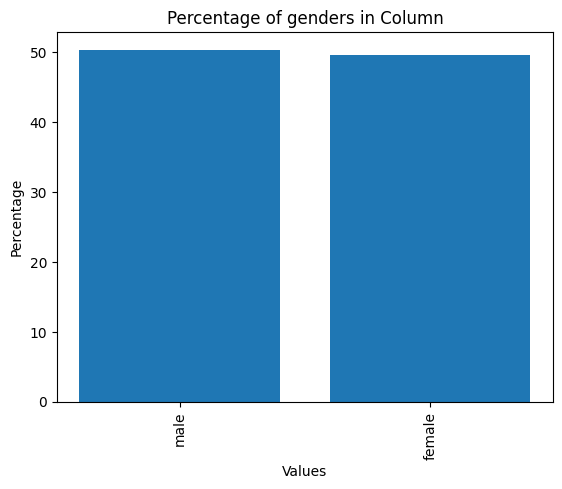

In [91]:
plot_percentage('gender')

In [92]:
def get_target_marginals(d):
    factors = list(d.keys())
    targets = [sorted([(k2, v2) for k2, v2 in v.items()]) for k, v in d.items()]
    targets = np.array([[v for _, v in item] for item in targets])
    # print("inside func",type(targets))
    return factors, targets

def get_table(df, targets):
    factors, target_marginals = get_target_marginals(targets)

    cross_tab = pd.crosstab(df[factors[0]], [df[c] for c in factors[1:]])
    shape = tuple([df[c].unique().shape[0] for c in factors])
    table = cross_tab.values.reshape(shape)
    # print(factors)
    # print(target_marginals)
    return factors, target_marginals, table




#### table = contigency table

In [93]:
#tester
# f, u, X = get_table(df, {
#     'race': {'white': 5800, 'other': 4200},
#     'age': {'minor': 2800, 'adult': 7200},
#     'gender': {'male': 4900, 'female': 5100}
# })
# print(f,u,X)

Loading data from census

In [94]:
#ddg = demographic_data_groups
ddg=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\census\\temp_demographic.csv")

ddg

,topic,category,sub-category,id,value
0,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Female,DP05_0089E,12982938.0
1,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male,DP05_0088E,12511445.0
2,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",NaN,DP05_0087E,25494383.0
3,HISPANIC OR LATINO AND RACE,Total population,Hispanic or Latino (of any race),DP05_0071E,15327688.0
4,HISPANIC OR LATINO AND RACE,Total population,Hispanic or Latino (of any race),DP05_0072E,12687312.0
...,...,...,...,...,...
84,SEX AND AGE,Total population,Sex ratio (males per 100 females),DP05_0004E,98.8
85,SEX AND AGE,Total population,Under 18 years,DP05_0019E,9022146.0
86,SEX AND AGE,Total population,Under 5 years,DP05_0005E,2451528.0
87,SEX AND AGE,Total population,NaN,DP05_0001E,39283497.0


#### fetching margin values from demographic data groups 

In [95]:
temp_race = {'white': 'DP05_0064E', 'black': 'DP05_0065E', 'native': 'DP05_0066E',
             'asian': 'DP05_0067E', 'pacific-islander': 'DP05_0068E', 'other': 'DP05_0069E'}
temp_sex = {'male': 'DP05_0002E', 'female': 'DP05_0003E'}
temp_age = {
    'child': ddg.loc[ddg['id'] == 'DP05_0005E', 'value'].values[0],
    'tenager': ddg.loc[ddg['id'] == 'DP05_0006E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0007E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0008E', 'value'].values[0],
    'young-adult': ddg.loc[ddg['id'] == 'DP05_0009E', 'value'].values[0],
    'adult': ddg.loc[ddg['id'] == 'DP05_0010E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0011E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0012E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0013E', 'value'].values[0],
    'senior': ddg.loc[ddg['id'] == 'DP05_0014E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0015E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0016E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0017E', 'value'].values[0]
}
margin_dict = {
    'race': {key: ddg.loc[ddg['id'] == value, 'value'].values[0] for key, value in temp_race.items()},
    'age': temp_age,
    'gender': {key: ddg.loc[ddg['id'] == value, 'value'].values[0] for key, value in temp_sex.items()}
}
# ddg.columns
# df = pd.read_csv("CA-data\\pums\\temp_pums.csv", usecols=col_list)
margin_dict


{'race': {'white': 25048942.0,
  'black': 2766478.0,
  'native': 762733.0,
  'asian': 6551732.0,
  'pacific-islander': 323042.0,
  'other': 5944874.0},
 'age': {'child': 2451528.0,
  'tenager': 7608859.0,
  'young-adult': 2751567.0,
  'adult': 18748401.0,
  'senior': 7723142.0},
 'gender': {'male': 19526298.0, 'female': 19757199.0}}

In [96]:
f, u, X = get_table(df, margin_dict)

C:\Users\abubabu\AppData\Local\Temp\ipykernel_30208\1338528954.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  targets = np.array([[v for _, v in item] for item in targets])


In [97]:
X.shape

(6, 5, 2)

In [98]:
type(X)

numpy.ndarray

In [99]:
for i in u:
    i=np.array(i)
    print(type(i))
    for j in i :
        print(type(j))

<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>


X = contigency table\
u = target marginals\
f = helper vector

In [100]:
X

array([[[  95,   75],
        [   7,    8],
        [  21,   10],
        [  32,   33],
        [  35,   31]],

       [[  73,  121],
        [  23,   16],
        [  11,   20],
        [  58,   77],
        [  19,   51]],

       [[ 814,  836],
        [ 245,  274],
        [ 325,  259],
        [ 607,  654],
        [ 192,  230]],

       [[ 253,  359],
        [ 142,  118],
        [  97,   83],
        [ 247,  257],
        [  93,   79]],

       [[   2,    5],
        [   3,    1],
        [   2,    4],
        [   0,    1],
        [   1,    4]],

       [[7241, 7390],
        [1216, 1262],
        [6267, 5725],
        [2808, 3106],
        [1293, 1485]]], dtype=int64)

In [101]:
def get_coordinates(M):
    return list(itertools.product(*[list(range(n)) for n in M.shape]))

# returns a dict with marginals for each unique value of dimention i in M
def get_marginals(M, i):
    coordinates = get_coordinates(M)
    #print(M)  # M hoilo marginals
    key = lambda tup: tup[0]
    counts = [(c[i], M[c]) for c in coordinates]
    counts = sorted(counts, key=key)
    counts = itertools.groupby(counts, key=key)
    counts = {k: sum([v[1] for v in g]) for k, g in counts}

    return counts

def get_all_marginals(M):
    return np.array([[v for _, v in get_marginals(M, i).items()]
                     for i in range(len(M.shape))])

# returns a dict with counts for each unique value of dimention i in M
def get_counts(M, i):
    coordinates = get_coordinates(M)

    key = lambda tup: tup[0]
    counts = [(c[i], M[c], c) for c in coordinates]
    counts = sorted(counts, key=key)
    counts = itertools.groupby(counts, key=key)
    counts = {k: [(tup[1], tup[2]) for tup in g] for k, g in counts}

    return counts

#ipu
def update_values(M, i, u):
    marg = get_marginals(M, i)
    vals = get_counts(M, i)

    d = [[(c, n * u[k] / marg[k]) for n, c in v] for k, v in vals.items()]
    d = itertools.chain(*d)
    d = list(d)

    return d

def ipf_update(M, u):
    for i in range(len(M.shape)):
        values = update_values(M, i, u[i])
        for idx, v in values:
            M[idx] = v

    o = get_all_marginals(M)
    d = get_deltas(o, u)

    return M, d

# o-t
def get_deltas(o, t):
    return np.array([np.linalg.norm(np.array(o[r]) - np.array(t[r]), 2) for r in range(o.shape[0])])


def get_weights(X, max_iters=50, zero_threshold=0.0001, convergence_threshold=3, debug=True):
    M = X.copy()

    d_prev = np.zeros(len(M.shape))
    count_zero = 0

    for _ in range(max_iters):
        M, d_next = ipf_update(M, u)
        d = np.linalg.norm(d_prev - d_next, 2)

        if d < zero_threshold:
            count_zero += 1

        if debug:
            print(','.join([f'{v:.5f}' for v in d_next]), d)
        d_prev = d_next

        # breaks if zero threshold triggered in 3 consecutive run
        if count_zero >= convergence_threshold:
            break

    w = M / M.sum()
    return w

In [102]:
w = get_weights(X)

1437161.21794,12129.64538,19.10497 1437212.4042830274
1372175.42992,344.83909,21.26029 66045.69864377548
1365298.84404,15.77973,20.61553 6884.454506489229
1364779.95713,10.29563,10.00000 519.0244527219712
1364746.29350,11.78983,10.81665 33.706669370412314
1364742.44770,9.05539,9.89949 4.807136062628854
1364742.03755,12.12436,9.21954 3.1700368413681383
1364744.21895,8.06226,10.81665 4.879537436099809
1364744.27021,12.96148,11.40175 4.934304685703276
1364744.55659,9.69536,8.48528 4.388094907338861
1364746.91693,10.09950,10.00000 2.8335326887097807
1364746.38158,9.11043,9.43398 1.259061049673504
1364747.28417,8.88819,9.21954 0.9539578781487312
1364747.22665,9.27362,8.48528 0.8312651845251102
1364746.17137,9.38083,8.48528 1.0607116123809048
1364746.60318,8.12404,8.48528 1.328904369994531
1364748.86481,10.34408,10.81665 3.9343133458984227
1364748.25572,7.54983,10.81665 2.859858541717248
1364747.09585,9.11043,9.21954 2.5162528359381504
1364747.87845,6.78233,8.60233 2.5324859991445026
1364747

C:\Users\abubabu\AppData\Local\Temp\ipykernel_30208\1855466793.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[v for _, v in get_marginals(M, i).items()]


In [103]:
w

array([[[0.05177196, 0.03937754],
        [0.00257067, 0.00283038],
        [0.00814172, 0.00373457],
        [0.01480973, 0.01471415],
        [0.0109599 , 0.0093522 ]],

       [[0.01256014, 0.0200582 ],
        [0.00266672, 0.00178693],
        [0.00134606, 0.00235822],
        [0.00847473, 0.01083977],
        [0.00187822, 0.00485759]],

       [[0.00409882, 0.00405572],
        [0.00083104, 0.00089536],
        [0.00116398, 0.00089343],
        [0.00259567, 0.00269413],
        [0.00055527, 0.00064088]],

       [[0.0256884 , 0.03511898],
        [0.00971719, 0.00777935],
        [0.00700707, 0.00577637],
        [0.02129908, 0.02135111],
        [0.00542564, 0.00444042]],

       [[0.0009042 , 0.00217835],
        [0.00091402, 0.00029323],
        [0.00064322, 0.00123966],
        [0.        , 0.00036982],
        [0.00025965, 0.00100111]],

       [[0.14191098, 0.13953581],
        [0.01606148, 0.0160596 ],
        [0.08738631, 0.07690965],
        [0.04673615, 0.04980655],
    

In [104]:
w.shape

(6, 5, 2)

In [105]:
races=['white','black','native','asian','pacific-islander','other']
genders=['male','female']
ages=['child','tenager','young-adult','adult','senior']

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
array_3d=w
# Assuming you have a numpy array called 'data' with shape (6, 5, 2)
# Replace 'data' with the actual name of your array
column_names = ['male','female']

# Create row and column index labels
row_labels = ['white','black','native','asian','pacific-islander','other']
column_labels = ['child','tenager','young-adult','adult','senior']

# Create multi-index for rows and columns
row_index = pd.MultiIndex.from_product([row_labels, column_labels], names=['Race', 'Age'])
column_index = pd.MultiIndex.from_product([column_names], names=['sex'])

# Create DataFrame
weight_df = pd.DataFrame(array_3d.reshape((-1, array_3d.shape[2])), index=row_index, columns=column_index)

# Display the DataFrame
weight_df

sex                               male    female
Race             Age                            
white            child        0.051772  0.039378
                 tenager      0.002571  0.002830
                 young-adult  0.008142  0.003735
                 adult        0.014810  0.014714
                 senior       0.010960  0.009352
black            child        0.012560  0.020058
                 tenager      0.002667  0.001787
                 young-adult  0.001346  0.002358
                 adult        0.008475  0.010840
                 senior       0.001878  0.004858
native           child        0.004099  0.004056
                 tenager      0.000831  0.000895
                 young-adult  0.001164  0.000893
                 adult        0.002596  0.002694
                 senior       0.000555  0.000641
asian            child        0.025688  0.035119
                 tenager      0.009717  0.007779
                 young-adult  0.007007  0.005776
                 adult        0.021299  0.021351
                 senior       0.005426  0.004440
pacific-islander child        0.000904  0.002178
                 tenager      0.000914  0.000293
                 young-adult  0.000643  0.001240
                 adult        0.000000  0.000370
                 senior       0.000260  0.001001
other            child        0.141911  0.139536
                 tenager      0.016061  0.016060
                 young-adult  0.087386  0.076910
                 adult        0.046736  0.049807
                 senior       0.014561  0.016112

In [107]:
weight_df.shape

(30, 2)

In [108]:
# data=df
# fig, ax = plt.subplots()
# colors = np.random.rand(*data.shape)
# # Create a table from the dataframe
# table = ax.table(cellText=data, cellColours=colors, loc='center')

# # Set the font size and cell padding
# table.set_fontsize(14)
# table.scale(1, 1.5)  # Adjust the scaling if needed
# table.auto_set_column_width(col=list(range(len(data[0]))))  # Auto adjust column width

# # Hide the axes
# ax.axis('off')

# # Show the plot
# plt.show()

In [109]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming you have a 3D DataFrame named "df"
# # Create a sample 3D DataFrame
# row_labels = ['white','black','native','asian','pacific-islander','other']
# column_labels = ['child','tenager','young-adult','adult','senior']
# value_columns = ['male','female']
# # data = np.random.rand(6, 5, 2)
# # df = pd.DataFrame(data, index=row_labels, columns=column_labels, dtype=float)
# # Plot each depth slice as a heatmap
# fig, axs = plt.subplots(1, df.shape[2], figsize=(12, 4))
# for i in range(df.shape[2]):
#     heatmap = axs[i].imshow(df.iloc[:, :, i], cmap='viridis')
#     axs[i].set_title(f'Depth {i}')
#     axs[i].set_xlabel('Column')
#     axs[i].set_ylabel('Row')
#     plt.colorbar(heatmap, ax=axs[i])

# plt.tight_layout()
# plt.show()

<b> Sampling </b>

In [110]:
import functools

def get_sampling_weights(df, f, w):
    get_filters = lambda df, fields, values: [df[f] == v for f, v in zip(fields, values)]
    get_total = lambda df, fields, values: df[functools.reduce(lambda a, b: a & b, get_filters(df, fields, values))].shape[0]

    return {k: v / get_total(df, f, k) for k, v in zip(list(itertools.product(*[sorted(df[c].unique()) for c in f])), np.ravel(w))}

def get_samples(df, f, w, n=10_000):
    weights = get_sampling_weights(df, f, w)
    s = df.apply(lambda r: weights[tuple([r[c] for c in f])], axis=1)
    return df.sample(n=n, replace=True, weights=s)

sample_df = get_samples(df, f, w)
sample_df

C:\Users\abubabu\AppData\Local\Temp\ipykernel_30208\671011591.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return {k: v / get_total(df, f, k) for k, v in zip(list(itertools.product(*[sorted(df[c].unique()) for c in f])), np.ravel(w))}


,race,age,gender
32332,white,adult,male
40892,asian,adult,female
34835,black,adult,male
5924,asian,adult,female
37947,white,senior,female
...,...,...,...
43451,black,adult,male
23762,white,child,male
538,native,adult,male
2001,white,young-adult,female


In [119]:
sample_df.to_csv("sampled_noHH.csv")

In [111]:
f

['race', 'age', 'gender']

Cross-tabulation of resulting sampled matrix

In [112]:
ct = pd.crosstab(sample_df.race, [sample_df.age, sample_df.gender])
ct #cross-tabulation of the resulting sampled matrix.

age               adult        child      senior      tenager       \
gender           female  male female male female male  female male   
race                                                                 
asian               556   413     24   28     67   43     148  144   
black               135   217     37   15     10   18      76  109   
native               26    43      9   11     15    5      34   21   
other               246   311     88   79     71   58     206  236   
pacific-islander     10    22      8    5      5   16       0    0   
white              1416  1436    142  157    820  774     480  490   

age              young-adult       
gender                female male  
race                               
asian                    119   99  
black                     12   36  
native                     5    9  
other                     51   49  
pacific-islander           4    8  
white                    145  183

In [113]:
def plot_percentage_sample(col):
    global sample_df
    # Count the frequencies of different values in the column
    value_counts = sample_df[col].value_counts()

    # Calculate the percentages
    percentages = (value_counts / len(sample_df)) * 100

    # Create a bar plot of the percentages
    plt.bar(percentages.index, percentages.values)

    # Set the labels and title
    plt.xlabel('Values')
    plt.ylabel('Percentage')
    plt.title('Percentage of '+col+'s in Column')

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

In [114]:
sample_df.race.value_counts().sort_index() / sample_df.shape[0]

asian               0.1641
black               0.0665
native              0.0178
other               0.1395
pacific-islander    0.0078
white               0.6043
Name: race, dtype: float64

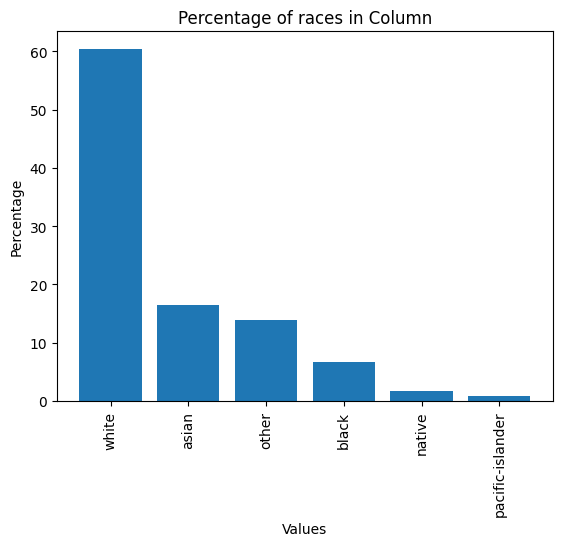

In [115]:
plot_percentage_sample('race')

In [120]:
# Plotting the comparison
# plt.figure(figsize=(8, 6))

# plt.scatter(df['race'], sample_df['race'], color='blue', label='Comparison')

# plt.xlabel('Value - DataFrame 1')
# plt.ylabel('Value - DataFrame 2')
# plt.title('Comparison between DataFrame 1 and DataFrame 2')
# plt.legend()

# plt.show()

In [ ]:
sample_df.age.value_counts().sort_index() / sample_df.shape[0]

adult          0.4751
child          0.0657
senior         0.1983
tenager        0.1881
young-adult    0.0728
Name: age, dtype: float64

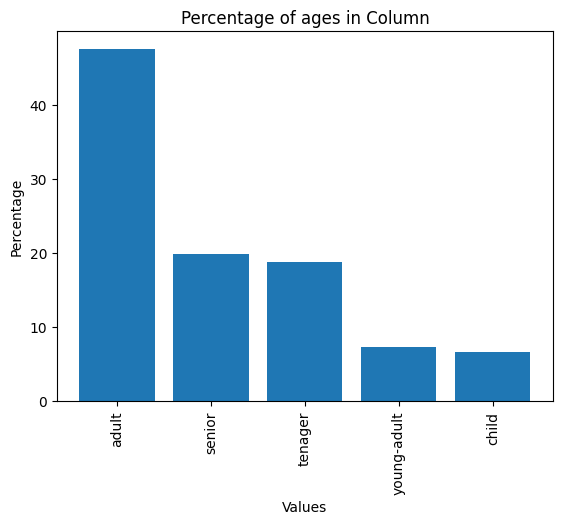

In [ ]:
plot_percentage_sample('age')

In [ ]:
sample_df.gender.value_counts().sort_index() / sample_df.shape[0]

female    0.4996
male      0.5004
Name: gender, dtype: float64

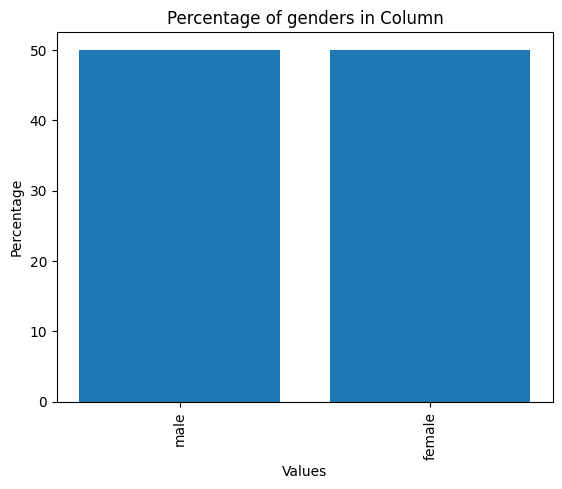

In [ ]:
plot_percentage_sample('gender')

In [ ]:
sample_df.to_csv("SAMPLE_DATA.csv",header=True)

marginals remain kind of the same